# OpenCv

### 1-How to Read image using Opencv?

In [48]:
import cv2

In [49]:

img = cv2.imread("HandLines1.jpg", cv2.IMREAD_COLOR)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 2- How to Read Video using opencv?

In [50]:
cap = cv2.VideoCapture('GAN')

if (cap.isOpened()== False):
    print("Error opening video stream or file")


while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame',frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):  
                break

    else:
         break
            
            
cap.release()
cv2.destroyAllWindows()


## 3-How to resize image and conver gray scale and save new image  by using opencv?

In [51]:
down_width = 600

down_height = 300

down_points = (down_width, down_height)

resized_down = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)
#or newimg=cv2.resize(image,(500,500))
cv2.imshow("Resized image", resized_down)
cv2.waitKey()
cv2.destroyAllWindows()


In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray image', gray)
cv2.waitKey()
cv2.destroyAllWindows()

In [53]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

## 4-How to read live camera and save live camera ?

In [54]:


# This will return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

# loop runs if capturing has been initialized.
while(True):
	# reads frames from a camera
	# ret checks return at each frame
	ret, frame = cap.read()

	# Converts to HSV color space, OCV reads colors as BGR
	# frame is converted to hsv
	hsv = frame
	
	# output the frame
	out.write(hsv)
	
	# The original input frame is shown in the window
	cv2.imshow('Original', frame)

    # Wait for 'a' key to stop the program
	if cv2.waitKey(1) & 0xFF == ord('a'):
		break

# Close the window / Release webcam
cap.release()

# After we release our webcam, we also release the output
out.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()

## 5-Read Video (images and audio)

In [16]:


import cv2
import numpy as np
#ffpyplayer for playing audio
from ffpyplayer.player import MediaPlayer
video_path="Virtual_Memory.mp4"
def PlayVideo(video_path):
    video=cv2.VideoCapture(video_path)
    player = MediaPlayer(video_path)
    while True:
        grabbed, frame=video.read()
        audio_frame, val = player.get_frame()
        if not grabbed:
            print("End of video")
            break
        if cv2.waitKey(28) & 0xFF == ord("q"):
            break
        cv2.imshow("Video", frame)
        if val != 'eof' and audio_frame is not None:
            #audio
            img, t = audio_frame
    video.release()
    cv2.destroyAllWindows()
PlayVideo(video_path)


## 6-Visualize images by using matplotlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("istockphoto-1368965646-170667a.jpg")
plt.show(img)

## 7-How to find contors by use opencv?

In [57]:
image = cv2.imread('images.jpg')
cv2.waitKey(0)
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
  
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 260


In [73]:

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
cv2.imwrite('HandLines1.jpg', thresh)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = img.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)

cv2.waitKey(0)
cv2.imwrite('HandLines1.jpg', image_copy)
cv2.destroyAllWindows()


## 8-how to detect edges in image by using opencv?

In [76]:

while True:
    edges = cv2.Canny(img_gray, threshold1=50, threshold2=300)
    cv2.imshow("edges", edges)
    if cv2.waitKey(1) == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

## 9-how to apply different filters ?

In [79]:
image = cv2.imread('HandLines1.jpg')

# Print error message if image is null
if image is None:
    print('Could not read image')

# Apply identity kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

cv2.imshow('Original', image)
cv2.imshow('Identity', identity)
    
cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
cv2.destroyAllWindows()

# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
    
cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()

In [80]:
Bgfilter=cv2.bilateralFilter(img,-90,200,30)
cv2.imshow("Hand",Bgfilter )

key= cv2.waitKey(0)
if key==81:
    exit

In [81]:
Boxfilter=cv2.boxFilter(img,0,(1,1),img ,(-1,-1),False)
cv2.imshow("Hand",Boxfilter )

key= cv2.waitKey(0)
if key==81:
    exit

In [86]:
import cv2 as cv
#read the image

#convert the BGR image to HSV colour space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#set the bounds for the red hue
lower_red = np.array([160,100,50])
upper_red = np.array([180,255,255])

#create a mask using the bounds set
mask = cv.inRange(hsv, lower_red, upper_red)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)

#create resizable windows for the images
#cv.namedWindow("res", cv.WINDOW_NORMAL)
#cv.namedWindow("hsv", cv.WINDOW_NORMAL)
#cv.namedWindow("mask", cv.WINDOW_NORMAL)
cv.namedWindow("added", cv.WINDOW_NORMAL)
cv.namedWindow("back", cv.WINDOW_NORMAL)
#cv.namedWindow("mask_inv", cv.WINDOW_NORMAL)
cv.namedWindow("gray", cv.WINDOW_NORMAL)

#display the images
cv.imshow("back", background)
#cv.imshow("mask_inv", mask_inv)
cv.imshow("added",added_img)
#cv.imshow("mask", mask)
cv.imshow("gray", gray)
cv.imshow("hsv", hsv)
#cv.imshow("res", res)

if cv.waitKey(0):
    cv.destroyAllWindows()

In [87]:
import numpy as np 
kernel = np.ones((5,5),np.float32)/25
result = cv2.filter2D(img,-1,kernel)

cv2.imshow('Filter 2D Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 10-load 5 images and resize and save them 

In [88]:

l=['HandLines1.jpg','istockphoto-1368965646-170667a.jpg','800px-Paume_de_main.jpeg']
images=[]
for i in l:
    img=cv2.imread(i)
    img=cv2.resize(img,(500,500))
    images.append(img)
for image in images:
    cv.imshow("image ", image)
    cv2.waitKey()
    cv2.destroyAllWindows()

## 11-how to make facedetection by use opencv?

In [47]:
import cv2
import os

cascPath=os.path.dirname(cv2.__file__)+"/data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frames = video_capture.read()

    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frames, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frames)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

In [34]:
haar_cascade_face  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# haar_cascade_face = cv2.CascadeClassifier('data/haarcascade/haarcascade_frontalface_default.xml')
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

In [42]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

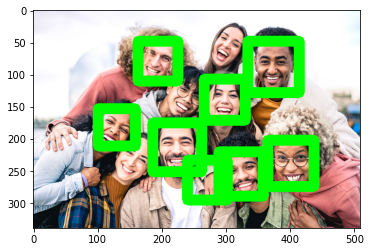

In [43]:
import matplotlib.pyplot as plt
#loading image
test_image2 = cv2.imread('istockphoto-1368965646-170667a.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))